# CICE6 Standalone Analysis Notebook

In [188]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cftime
import datetime
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import sys, os, warnings
from dask.distributed import Client
from datetime import timedelta
import glob
import os
from datatree import DataTree, map_over_subtree

# plotting
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean.cm as cmo
import matplotlib.lines as mlines
import cartopy.feature as cft
import matplotlib.colors as mcolors

warnings.filterwarnings('ignore')

In [189]:
experiments = ["baseline-gx3", "wave-constant-gx3", "wave-profile-gx3", "wave-random-gx3"]  # Add your experiment names here
base_dir = "/Users/noahday/GitHub/cice-dev/cice-dirs/runs/"

VARS = ["aice", "hi", "wave_sig_ht", "fsdrad"]
keep_vars = ["TLAT", "TLON", "time", "tarea"] + VARS

# Create an empty dictionary to store datasets
datasets = {}

for expt in experiments:
    path = os.path.join(base_dir, expt, "history/")
    file_pattern = os.path.join(path, "iceh.????-??.nc")  # Adjust this if needed
    files = sorted(glob.glob(file_pattern))
    
    if not files:
        print(f"No files found for {expt}, skipping...")
        continue

    sample_ds = xr.open_dataset(files[0])
    drop_vars = [var for var in sample_ds.variables if var not in keep_vars]

    ds = xr.open_mfdataset(
        files, 
        chunks="auto",
        combine="by_coords", 
        decode_timedelta=False,
        drop_variables=drop_vars
    )

    datasets[expt] = ds  # Store the dataset in the dictionary

dt = DataTree.from_dict({expt: DataTree(data=ds) for expt, ds in datasets.items()})
dt

DataTree('None', parent=None)
├── DataTree('baseline-gx3')
│       Dimensions:      (time: 12, nj: 116, ni: 100)
│       Coordinates:
│         * time         (time) datetime64[ns] 2005-02-01 2005-03-01 ... 2006-01-01
│           TLON         (nj, ni) float32 dask.array<chunksize=(116, 100), meta=np.ndarray>
│           TLAT         (nj, ni) float32 dask.array<chunksize=(116, 100), meta=np.ndarray>
│       Dimensions without coordinates: nj, ni
│       Data variables:
│           tarea        (time, nj, ni) float32 dask.array<chunksize=(1, 116, 100), meta=np.ndarray>
│           hi           (time, nj, ni) float32 dask.array<chunksize=(1, 116, 100), meta=np.ndarray>
│           aice         (time, nj, ni) float32 dask.array<chunksize=(1, 116, 100), meta=np.ndarray>
│           wave_sig_ht  (time, nj, ni) float32 dask.array<chunksize=(1, 116, 100), meta=np.ndarray>
│           fsdrad       (time, nj, ni) float32 dask.array<chunksize=(1, 116, 100), meta=np.ndarray>
│       Attributes:
│           title:               sea ice model output for CICE
│           contents:            Diagnostic and Prognostic Variables
│           source:              Los Alamos Sea Ice Model, CICE_6.6.0
│           comment:             This year has 365 days
│           comment2:            File written on model date 20050201
│           comment3:            seconds elapsed into model date:      0
│           time_period_freq:    month_1
│           time_axis_position:  end
│           conventions:         CF-1.0
│           history:             This dataset was created on 2025-03-19 at 08:39:13.3
│           io_flavor:           io_netcdf
├── DataTree('wave-constant-gx3')
│       Dimensions:      (time: 11, nj: 116, ni: 100)
│       Coordinates:
│         * time         (time) datetime64[ns] 2005-02-01 2005-03-01 ... 2005-12-01
│           TLON         (nj, ni) float32 dask.array<chunksize=(116, 100), meta=np.ndarray>
│           TLAT         (nj, ni) float32 dask.array<chunksize=(116, 100), meta=np.ndarray>
│       Dimensions without coordinates: nj, ni
│       Data variables:
│           tarea        (time, nj, ni) float32 dask.array<chunksize=(1, 116, 100), meta=np.ndarray>
│           hi           (time, nj, ni) float32 dask.array<chunksize=(1, 116, 100), meta=np.ndarray>
│           aice         (time, nj, ni) float32 dask.array<chunksize=(1, 116, 100), meta=np.ndarray>
│           wave_sig_ht  (time, nj, ni) float32 dask.array<chunksize=(1, 116, 100), meta=np.ndarray>
│           fsdrad       (time, nj, ni) float32 dask.array<chunksize=(1, 116, 100), meta=np.ndarray>
│       Attributes:
│           title:               sea ice model output for CICE
│           contents:            Diagnostic and Prognostic Variables
│           source:              Los Alamos Sea Ice Model, CICE_6.6.0
│           comment:             This year has 365 days
│           comment2:            File written on model date 20050201
│           comment3:            seconds elapsed into model date:      0
│           time_period_freq:    month_1
│           time_axis_position:  end
│           conventions:         CF-1.0
│           history:             This dataset was created on 2025-03-19 at 11:19:13.4
│           io_flavor:           io_netcdf
├── DataTree('wave-profile-gx3')
│       Dimensions:      (time: 12, nj: 116, ni: 100)
│       Coordinates:
│         * time         (time) datetime64[ns] 2005-02-01 2005-03-01 ... 2006-01-01
│           TLON         (nj, ni) float32 dask.array<chunksize=(116, 100), meta=np.ndarray>
│           TLAT         (nj, ni) float32 dask.array<chunksize=(116, 100), meta=np.ndarray>
│       Dimensions without coordinates: nj, ni
│       Data variables:
│           tarea        (time, nj, ni) float32 dask.array<chunksize=(1, 116, 100), meta=np.ndarray>
│           hi           (time, nj, ni) float32 dask.array<chunksize=(1, 116, 100), meta=np.ndarray>
│           aice         (time, nj, ni) float32 dask.array<chunksize=(1, 116, 100), me

In [190]:
# !conda install -c conda-forge datatree -y
# xr.DataTree

# !conda install xarray-datatree --channel conda-forge -y
# !conda update -n base -c defaults conda

In [191]:
# expt = "baseline-gx3"
# base_dir = f"/Users/noahday/GitHub/cice-dev/cice-dirs/runs/{expt}/history/"
# path = base_dir
# file_pattern = os.path.join(path, "iceh.????-??.nc") # ????-??-01
# files = sorted(glob.glob(file_pattern))
# # print(files)

# sample_ds = xr.open_mfdataset(files[0],combine="by_coords")
# VARS = ["aice", "hi", "wave_sig_ht", "fsdrad"]
# # List of variables to keep
# keep_vars = ["TLAT", "TLON", "time", "tarea"] + VARS

# drop_vars = [var for var in sample_ds.variables if var not in keep_vars]

# ds = xr.open_mfdataset(
#     files, 
#     chunks="auto",
#     combine="by_coords", 
#     decode_timedelta=False,
#     drop_variables=drop_vars  # Now using the correct list
# )
# ds

In [192]:
def basic_axis(number_panels):
    # Determine number of rows and columns for subplots
    ncols = int(np.ceil(np.sqrt(number_panels)))
    nrows = int(np.ceil(number_panels / ncols))
    
    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols,
        subplot_kw={'projection': ccrs.SouthPolarStereo(true_scale_latitude=-70)},
        figsize=(4 * ncols, 4 * nrows),  # Adjust figure size
        gridspec_kw={'wspace': 0.1, 'hspace': 0.15}  # Adjust spacing
    )
    
    if number_panels == 1:
        axes = np.array([[axes]])  # Ensure axes is always a 2D array
    elif nrows == 1 or ncols == 1:
        axes = axes.reshape((nrows, ncols))
    
    land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='gray', linewidth=0.5)
    
    for ax in axes.flat[:number_panels]:  # Only iterate over required axes
        ax.set_global()
        ax.coastlines(resolution='50m')
        ax.add_feature(land_50m)
        ax.set_extent([-180, 180, -90, -45], crs=ccrs.PlateCarree())
    
    # Hide unused subplots if necessary
    for ax in axes.flat[number_panels:]:
        ax.set_visible(False)
    axes = axes.flatten()
    return fig, axes

In [193]:
month_abbr

calendar.month_abbr[2]

'Feb'

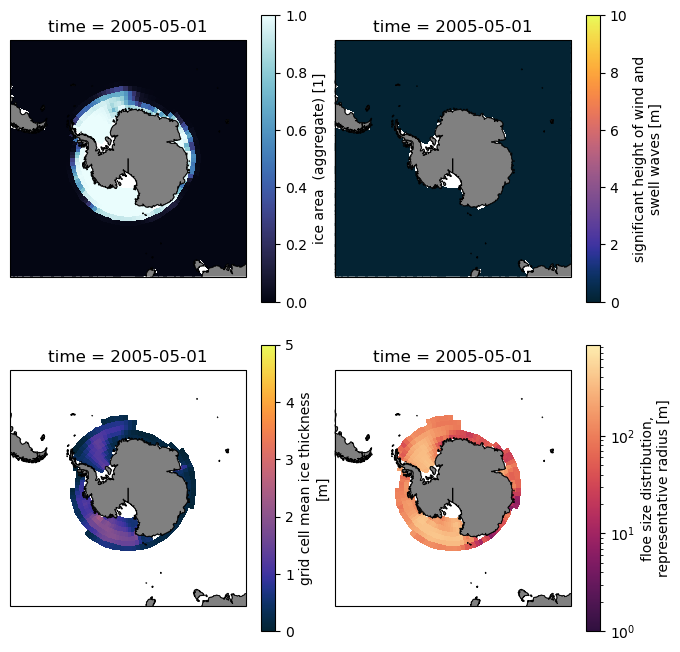

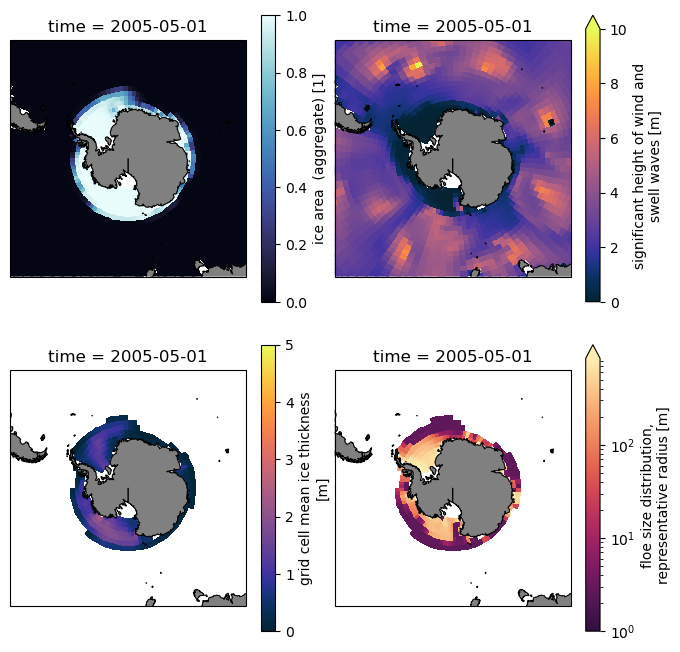

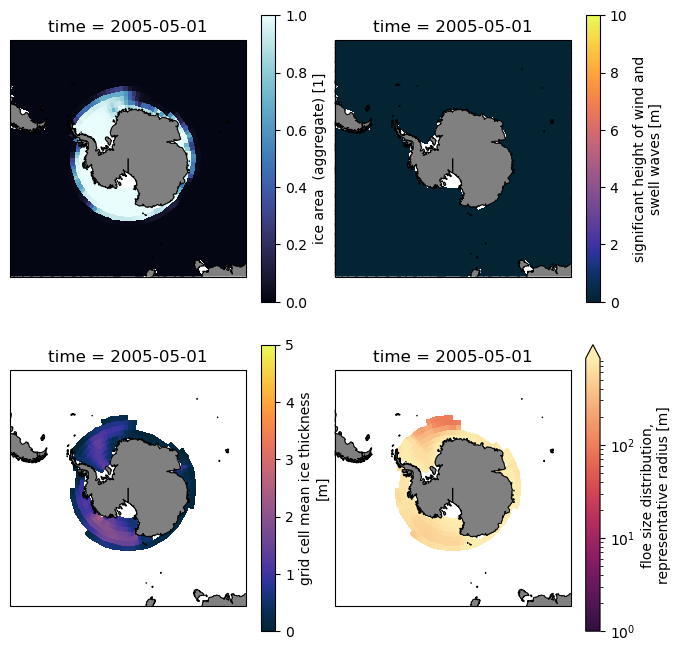

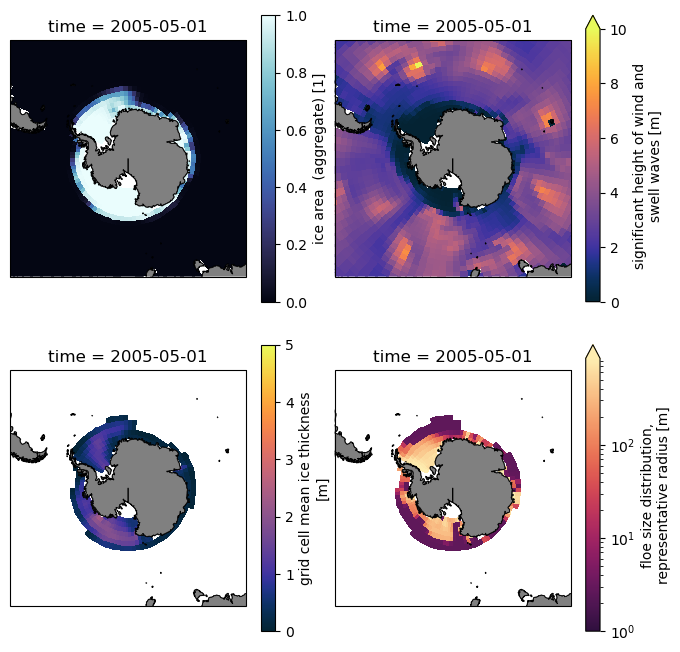

In [194]:
import calendar
month = 4 # 2 = Feb
month_abbr = calendar.month_abbr[month]

for iGroup in dt.groups[1:]:
    fig, axes = basic_axis(4)
    ds_plot = dt[iGroup].isel(time=month-1).copy()
    ds_plot["aice"].plot(ax=axes[0], x="TLON", y="TLAT", vmin=0, vmax=1, cmap=cmo.ice, transform=ccrs.PlateCarree()) 
    ds_plot["wave_sig_ht"].plot(ax=axes[1], x="TLON", y="TLAT", vmin=0, vmax=10, cmap=cmo.thermal, transform=ccrs.PlateCarree()) 
    ds_plot["hi"].where(ds_plot["aice"]>0.15).plot(ax=axes[2], x="TLON", y="TLAT", vmin=0, vmax=5, cmap=cmo.thermal, transform=ccrs.PlateCarree()) 
    ds_plot["fsdrad"].where(ds_plot["aice"]>0.15).plot(ax=axes[3], x="TLON", y="TLAT", cmap=cmo.matter_r, 
                                            norm=mcolors.LogNorm(vmin=1, vmax=850), transform=ccrs.PlateCarree()) 

    plt.savefig(f"figures/aice_swh_hi_fsdrad_{iGroup[1:]}_{month_abbr}.png", dpi=300, bbox_inches="tight") 

## Make a quick movie 🎬

In [292]:
from io import BytesIO
# import xarray as xr
import matplotlib

matplotlib.use("Agg")
import imageio.v3 as iio


def fancier_plot(ds_sel, time, var, hemisphere="south"):
    if hemisphere == "south":
        projection = ccrs.SouthPolarStereo(true_scale_latitude=-70)
        lat_limits = [-90, -45]
    elif hemisphere == "north":
        projection = ccrs.NorthPolarStereo(true_scale_latitude=70)
        lat_limits = [45, 90]
    else:
        raise ValueError("Invalid hemisphere. Choose 'north' or 'south'.")


    fig, ax = plt.subplots(
                         subplot_kw={'projection': projection},
                         gridspec_kw={'wspace': 0.1, 'hspace': 0.15})  # Adjust spacing

    # Add coastlines and land features
    land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
                                       edgecolor='black',
                                       facecolor='gray', linewidth=0.5)

    ax.set_global()
    ax.coastlines(resolution='50m')
    ax.add_feature(land_50m)
    ax.set_extent([-180, 180, lat_limits[0], lat_limits[1]], crs=ccrs.PlateCarree())

    plot_settings = {
        "aice": {"cmap": cmo.ice, "vmin": 0, "vmax": 1},  # Ice concentration (0 to 1)
        "fsdrad": {"cmap": cmo.thermal, "vmin": 0, "vmax": 850},  # Floe size distribution radius (m)
        "hi": {"cmap": cmo.deep, "vmin": 0, "vmax": 5},  # Sea ice thickness (m)
        "hs": {"cmap": cmo.amp, "vmin": 0, "vmax": 0.5},  # Snow depth on sea ice (m)
        "hfs": {"cmap": cmo.amp, "vmin": 0, "vmax": 1},  # Snow thickness on refrozen leads (m)
        "tice": {"cmap": cmo.balance, "vmin": -30, "vmax": 0},  # Ice temperature (°C)
        "uvel": {"cmap": cmo.balance, "vmin": -0.5, "vmax": 0.5},  # Ice velocity (zonal, m/s)
        "vvel": {"cmap": cmo.balance, "vmin": -0.5, "vmax": 0.5},  # Ice velocity (meridional, m/s)
        "strength": {"cmap": cmo.matter, "vmin": 0, "vmax": 50e3},  # Ice strength (N/m)
        "divu": {"cmap": cmo.curl, "vmin": -1e-5, "vmax": 1e-5},  # Divergence (1/s)
        "shear": {"cmap": cmo.curl, "vmin": 0, "vmax": 1e-5},  # Shear strain rate (1/s)
        "uocn": {"cmap": cmo.balance, "vmin": -0.5, "vmax": 0.5},  # Ocean current (zonal, m/s)
        "vocn": {"cmap": cmo.balance, "vmin": -0.5, "vmax": 0.5},  # Ocean current (meridional, m/s)
        "wave_sig_ht": {"cmap": cmo.tempo, "vmin": 0, "vmax": 10},  # Significant wave height (m)
    }

    # Get the settings for the selected variable, defaulting to None if not found
    settings = plot_settings.get(var, {})

    # Apply the settings in the plot call
    ds_sel[var].plot(
        ax=ax,
        x="TLON",
        y="TLAT",
        cmap=settings.get("cmap"),
        vmin=settings.get("vmin"),
        vmax=settings.get("vmax"),
        transform=ccrs.PlateCarree(),
    )
    with BytesIO() as buf:
        fig.savefig(buf, format="png")
        plt.close(fig)
        image = iio.imread(buf.getvalue())
    return image



In [196]:
client = Client(threads_per_worker = 1)

In [197]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:62726/status,
Dashboard: http://127.0.0.1:62726/status,Workers: 8
Total threads: 8,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:62727,Workers: 8
Dashboard: http://127.0.0.1:62726/status,Total threads: 8
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:62753,Total threads: 1
Dashboard: http://127.0.0.1:62757/status,Memory: 2.00 GiB
Nanny: tcp://127.0.0.1:62730,


In [296]:
%%time
import calendar
month = 2

model_name = 'cice6'
var = "aice"
hemisphere = "north"

for i, iGroup in enumerate(model_SIA_SIE_dt.groups[1:]):
    ds = dt[iGroup].copy()
    expt_name = iGroup[1:]
    ice_mask = (ds.aice > 0.15).compute()
    southern_ocean_mask = (ds.TLAT < -50).compute()
    combined_mask = ((ds.aice > 0.15) & (ds.TLAT < -50)).compute() # Mask not working
    ds_tmp = ds.where(southern_ocean_mask, drop=True).copy()
    ds_tmp = ds.chunk({"time": 1, "ni": -1, "nj": -1})

    futures = [
        client.submit(fancier_plot, ds_tmp.sel(time=time), time, var, hemisphere) for time in ds_tmp["time"].values
    ]

    with iio.imopen(f"figures/{var}_{model_name}_{expt_name}_{hemisphere}.gif", "w", extension=".gif") as f:
        for future in futures:
            image = future.result()
            f.write(image)



/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value

CPU times: user 2.22 s, sys: 621 ms, total: 2.84 s
Wall time: 5.28 s


/Users/noahday/opt/anaconda3/envs/notebook/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


In [199]:
%matplotlib inline

# ds_tmp['fsdrad'].where(ice_mask, drop=True).isel(time=0).plot()

In [200]:
# @map_over_subtree
# def sea_ice_area_model(ds, hemisphere="south"):
#     # print(ds.yt_ocean)
#     # sic = ds.aice_m.cf.sel(Y=slice(-90, 0))
    
#     if hemisphere == "south":
#         sic = ds.aice.sel(nj=slice(0,ds.nj.size//2))
#         variable_name = "si_area_south"
#     else:
#         sic = ds.aice.isel(nj=slice(ds.nj.size//2,ds.nj.size))
#         variable_name = "si_area_north"

#     print(type(sic))
    
#     # if isinstance(sic, DataTree):
#     #     print("sic is a DataTree object")
#     # else:
#     #     print("sic is NOT a DataTree object")
        
#     area_km2 = ds.tarea / 1e6
#     return sea_ice_area_model(sic, area_km2).to_dataset(name=variable_name).load()

In [297]:
def sea_ice_area(sic, area, range=[0.15, 1]):
    return (sic * area).where((sic >= range[0]) * (sic <= range[1])).cf.sum(["X", "Y"])

def sea_ice_area_model(sic, area, range=[0.15, 1]):
    return (sic * area).where((sic >= range[0]) * (sic <= range[1])).sum(["ni", "nj"])

def sea_ice_extent(sic, area, range=[0.15, 1]):
    return (area).where((sic >= range[0]) * (sic <= range[1])).cf.sum(["X", "Y"])

def sea_ice_extent_model(sic, area, range=[0.15, 1]):
    return (area).where((sic >= range[0]) * (sic <= range[1])).sum(["ni", "nj"])

In [298]:
@map_over_subtree
def calculate_SIA_SIE_model(ds):
    # Compute for Southern Hemisphere
    sic_south = ds.aice.where(ds.TLAT < 0)
    area_south_km2 = ds.tarea.where(ds.TLAT < 0) / 1e6
    si_area_south = sea_ice_area_model(sic_south, area_south_km2).to_dataset(name="si_area_south")
    si_extent_south = sea_ice_extent_model(sic_south, area_south_km2).to_dataset(name="si_extent_south")

    # Compute for Northern Hemisphere
    sic_north = ds.aice.where(ds.TLAT > 0)
    area_north_km2 = ds.tarea.where(ds.TLAT > 0) / 1e6
    si_area_north = sea_ice_area_model(sic_north, area_north_km2).to_dataset(name="si_area_north")
    si_extent_north = sea_ice_extent_model(sic_north, area_north_km2).to_dataset(name="si_extent_north")

    # Merge both hemispheres into a single dataset
    return xr.merge([si_area_south, si_extent_south, si_area_north, si_extent_north]).load()

In [299]:
model_SIA_SIE_dt = calculate_SIA_SIE_model(dt)
model_SIA_SIE_dt

DataTree('None', parent=None)
├── DataTree('baseline-gx3')
│       Dimensions:          (time: 12)
│       Coordinates:
│         * time             (time) datetime64[ns] 2005-02-01 2005-03-01 ... 2006-01-01
│       Data variables:
│           si_area_south    (time) float32 1.184e+07 6.82e+06 ... 1.495e+07 9.938e+06
│           si_extent_south  (time) float32 1.666e+07 1.113e+07 ... 1.824e+07 1.463e+07
│           si_area_north    (time) float32 1.669e+07 1.833e+07 ... 1.097e+07 1.439e+07
│           si_extent_north  (time) float32 1.784e+07 1.915e+07 ... 1.246e+07 1.568e+07
├── DataTree('wave-constant-gx3')
│       Dimensions:          (time: 11)
│       Coordinates:
│         * time             (time) datetime64[ns] 2005-02-01 2005-03-01 ... 2005-12-01
│       Data variables:
│           si_area_south    (time) float32 1.161e+07 6.546e+06 ... 1.935e+07 1.48e+07
│           si_extent_south  (time) float32 1.654e+07 1.088e+07 ... 2.23e+07 1.813e+07
│           si_area_north    (time) float32 1.669e+07 1.833e+07 ... 6.927e+06 1.096e+07
│           si_extent_north  (time) float32 1.784e+07 1.909e+07 ... 8.766e+06 1.246e+07
├── DataTree('wave-profile-gx3')
│       Dimensions:          (time: 12)
│       Coordinates:
│         * time             (time) datetime64[ns] 2005-02-01 2005-03-01 ... 2006-01-01
│       Data variables:
│           si_area_south    (time) float32 1.184e+07 6.823e+06 ... 1.51e+07 1.05e+07
│           si_extent_south  (time) float32 1.666e+07 1.113e+07 ... 1.828e+07 1.51e+07
│           si_area_north    (time) float32 1.669e+07 1.833e+07 ... 1.097e+07 1.44e+07
│           si_extent_north  (time) float32 1.784e+07 1.915e+07 ... 1.246e+07 1.568e+07
└── DataTree('wave-random-gx3')
        Dimensions:          (time: 11)
        Coordinates:
          * time             (time) datetime64[ns] 2005-02-01 2005-03-01 ... 2005-12-01
        Data variables:
            si_area_south    (time) float32 1.158e+07 6.51e+06 ... 1.934e+07 1.479e+07
            si_extent_south  (time) float32 1.654e+07 1.082e+07 ... 2.23e+07 1.809e+07
            si_area_north    (time) float32 1.669e+07 1.833e+07 ... 6.931e+06 1.096e+07
            si_extent_north  (time) float32 1.784e+07 1.909e+07 ... 8.766e+06 1.246e+07

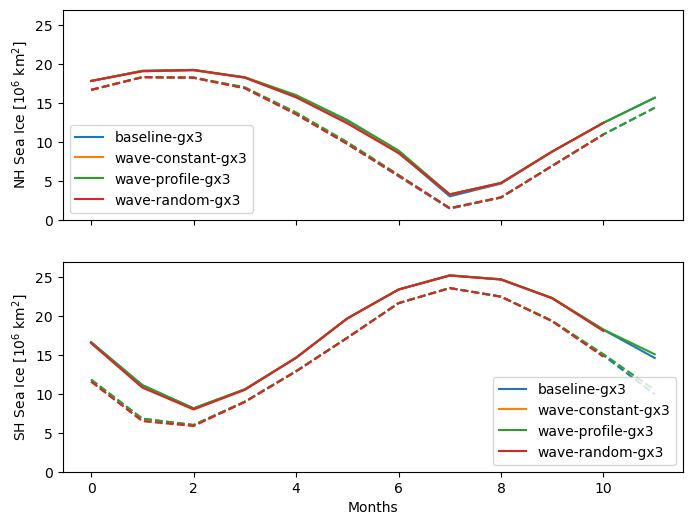

In [300]:
%matplotlib inline

import seaborn as sns
cmap = sns.color_palette(n_colors=6)


fig, axes = plt.subplots(nrows=2, figsize=(8, 6), sharex=True)

for i, iGroup in enumerate(model_SIA_SIE_dt.groups[1:]):
    # Top panel: Northern Hemisphere
    axes[0].plot(model_SIA_SIE_dt[iGroup]['si_extent_north'] * 1e-6, label=iGroup[1:], color=cmap[i])
    axes[0].plot(model_SIA_SIE_dt[iGroup]['si_area_north'] * 1e-6, linestyle='--', label='_nolegend_', color=cmap[i])
    axes[0].set_ylabel("NH Sea Ice [$10^6$ km$^2$]")


    # Bottom panel: Southern Hemisphere
    axes[1].plot(model_SIA_SIE_dt[iGroup]['si_extent_south'] * 1e-6, label=iGroup[1:], color=cmap[i])
    axes[1].plot(model_SIA_SIE_dt[iGroup]['si_area_south'] * 1e-6, linestyle='--', color=cmap[i], label='_nolegend_')
    axes[1].set_ylabel("SH Sea Ice [$10^6$ km$^2$]")
    axes[1].set_xlabel("Months")


for ax in axes:
    ax.set_ylim([0,27])
    ax.legend()

plt.savefig(f"figures/sie_{expt}.png", dpi=300, bbox_inches="tight") 
plt.show()

### Evolution of SIA-weighted variables

In [301]:
def sea_ice_area_weighted_average_model(data, sic, area, range=[0.15, 1]):
    mask = (sic >= range[0]) & (sic <= range[1])
    normalised_area = area.where(mask) / area.where(mask).sum(dim=["ni", "nj"])

    # Ensure normalised_area is properly computed before printing
    if False:
        max_value = normalised_area.max().compute()  # Use .compute() if using Dask
        total_sum = normalised_area.sum().compute()  # Should be ~1.0
    
        print(max_value.values)
        print(total_sum.values)

    return (data * normalised_area).where(mask).sum(dim=["ni", "nj"])

In [302]:
@map_over_subtree
def calculate_sea_ice_average_model(ds, var):
    # Compute for Southern Hemisphere
    data_south = ds[var].where(ds.TLAT < 0)
    aice_south = ds.aice.where(ds.TLAT < 0)
    area_south_km2 = ds.tarea.where(ds.TLAT < 0)
    si_ave_south = sea_ice_area_weighted_average_model(data_south, aice_south, area_south_km2).to_dataset(name="si_ave_south")
    

    # Compute for Northern Hemisphere
    data_north = ds[var].where(ds.TLAT > 0)
    aice_north = ds.aice.where(ds.TLAT > 0)
    area_north_km2 = ds.tarea.where(ds.TLAT > 0)
    si_ave_north = sea_ice_area_weighted_average_model(data_north, aice_north, area_north_km2).to_dataset(name="si_ave_north")

    # Merge both hemispheres into a single dataset
    return xr.merge([si_ave_south, si_ave_north]).load()

In [337]:
var = "fsdrad"
model_average_dt = calculate_sea_ice_average_model(dt, var)
model_average_dt

DataTree('None', parent=None)
├── DataTree('baseline-gx3')
│       Dimensions:       (time: 12)
│       Coordinates:
│         * time          (time) datetime64[ns] 2005-02-01 2005-03-01 ... 2006-01-01
│       Data variables:
│           si_ave_south  (time) float32 85.97 93.32 123.4 169.7 ... 448.8 506.8 591.3
│           si_ave_north  (time) float32 358.6 422.6 457.0 497.5 ... 270.0 308.8 386.3
├── DataTree('wave-constant-gx3')
│       Dimensions:       (time: 11)
│       Coordinates:
│         * time          (time) datetime64[ns] 2005-02-01 2005-03-01 ... 2005-12-01
│       Data variables:
│           si_ave_south  (time) float32 24.6 35.29 118.4 177.5 ... 109.9 117.2 133.8
│           si_ave_north  (time) float32 312.6 411.7 453.6 479.9 ... 791.5 761.6 678.4
├── DataTree('wave-profile-gx3')
│       Dimensions:       (time: 12)
│       Coordinates:
│         * time          (time) datetime64[ns] 2005-02-01 2005-03-01 ... 2006-01-01
│       Data variables:
│           si_ave_south  (time) float32 85.97 104.9 333.3 638.6 ... 834.1 831.7 830.7
│           si_ave_north  (time) float32 509.9 705.5 757.8 781.0 ... 838.7 811.1 828.6
└── DataTree('wave-random-gx3')
        Dimensions:       (time: 11)
        Coordinates:
          * time          (time) datetime64[ns] 2005-02-01 2005-03-01 ... 2005-12-01
        Data variables:
            si_ave_south  (time) float32 23.53 34.3 115.9 174.8 ... 105.0 112.2 128.8
            si_ave_north  (time) float32 311.9 410.8 452.9 479.0 ... 791.1 761.7 676.2

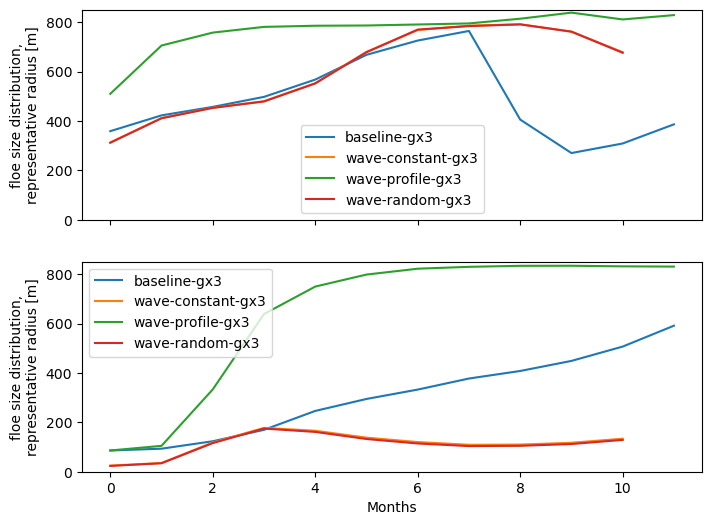

In [ ]:
%matplotlib inline

import textwrap
import seaborn as sns
cmap = sns.color_palette(n_colors=6)


fig, axes = plt.subplots(nrows=2, figsize=(8, 6), sharex=True)

for i, iGroup in enumerate(model_average_dt.groups[1:]):
    
    # Top panel: Northern Hemisphere
    axes[0].plot(model_average_dt[iGroup]['si_ave_north'], label=iGroup[1:], color=cmap[i])
    


    # Bottom panel: Southern Hemisphere
    axes[1].plot(model_average_dt[iGroup]['si_ave_south'], label=iGroup[1:], color=cmap[i])

    axes[1].set_xlabel("Months")

    long_name = dt[iGroup][var].long_name
    units = dt[iGroup][var].units
    wrapped_name = "\n".join(textwrap.wrap(long_name, width=30))  
    axes[0].set_ylabel(f"{wrapped_name} [{units}]")
    axes[1].set_ylabel(f"{wrapped_name} [{units}]")


for ax in axes:
    ax.set_ylim([0,dt[iGroup][var].max().values])
    ax.legend()

plt.savefig(f"figures/ts_sea_ice_average_{expt}_{var}.png", dpi=300, bbox_inches="tight") 
plt.show()

array(4.5844717, dtype=float32)

# Runtime analysis

In [206]:
for expt in experiments:
    expt_dir = os.path.join(base_dir, expt)
    
    # Find all cice.runlog.* files in the experiment directory, sorted by modification time (newest first)
    log_files = sorted(glob.glob(os.path.join(expt_dir, "cice.runlog.*")), key=os.path.getmtime, reverse=True)

    if not log_files:
        print(f"{expt}: No log files found")
        continue

    total_time = None

    # Try reading log files in order of newest to oldest
    for log_file in log_files:
        with open(log_file, "r") as file:
            log_text = file.read()

        match = re.search(r"Total\s+([\d.]+)\s+seconds", log_text)
        if match:
            total_time = float(match.group(1))
            print(f"{expt}: Total time: {total_time} seconds ({log_file})")
            break  # Stop once a valid time is found
    
    if total_time is None:
        print(f"{expt}: Total time not found in any log file")

baseline-gx3: Total time: 770.24 seconds (/Users/noahday/GitHub/cice-dev/cice-dirs/runs/baseline-gx3/cice.runlog.250319-083809)
wave-constant-gx3: Total time: 14.88 seconds (/Users/noahday/GitHub/cice-dev/cice-dirs/runs/wave-constant-gx3/cice.runlog.250318-201434)
wave-profile-gx3: Total time: 562.28 seconds (/Users/noahday/GitHub/cice-dev/cice-dirs/runs/wave-profile-gx3/cice.runlog.250319-124802)
wave-random-gx3: Total time: 106.1 seconds (/Users/noahday/GitHub/cice-dev/cice-dirs/runs/wave-random-gx3/cice.runlog.250318-202648)
